In [19]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
!pwd

/c/Users/Bharath/anaconda3/envs/SG_Land_Reclamation_analysis


In [3]:
!ls

Approx_SG.kml
debug.log
Displaying images.ipynb
Extracting_SG_from_Landsat8_images.ipynb
Generated DataFrames
HDB data
Landsat_Image_processing_final_experiments.ipynb
Landsat8_image_processing_initial_experimentation.ipynb
Population_data_World_Bank.ipynb
Population_density_and_Housing_density_analysis.ipynb
Predicting the future of SG.ipynb
SG_cropped_Landsat8_images
SG_Landsat8_images
SG_shapefiles


In [4]:
os.chdir('HDB data/')

In [5]:
!ls

dwelling-units-under-hdbs-management-by-town-and-flat-type.csv
estimated-percentage-of-singapore-resident-population-in-hdb-flats.csv
estimated-resident-population-in-hdb-flats-by-town.csv
Houses_by_type_2020.png
metadata-estimated-resident-population-living-in-hdb-flats.txt
metadata-number-of-residential-units-under-hdb-s-management.txt
metadata-total-land-area-of-singapore.txt
SG_population_data.csv
total-land-area-of-singapore.csv
World_bank_population_data.csv


#### Yearly population data 
- *Source: World Bank*
- File contains population data of all countries from 1960 to 2019


In [6]:
World_population_data = pd.read_csv('World_bank_population_data.csv')

In [7]:
World_population_data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0


In [8]:
SG_population_data = World_population_data[World_population_data['Country Code'] == 'SGP']

In [9]:
SG_population_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
206,Singapore,SGP,"Population, total",SP.POP.TOTL,1646400.0,1702400.0,1750200.0,1795000.0,1841600.0,1886900.0,...,5076732.0,5183688.0,5312437.0,5399162.0,5469724.0,5535002.0,5607283.0,5612253.0,5638676.0,5703569.0


In [10]:
SG_population_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [11]:
SG_population_data.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis = 1, inplace = True)

C:\Users\Bharath\anaconda3\envs\earth-analytics-python\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
SG_population_data = SG_population_data.transpose()

In [13]:
SG_population_data.head()

,206
1960,1646400.0
1961,1702400.0
1962,1750200.0
1963,1795000.0
1964,1841600.0


In [14]:
SG_population_data.rename(columns = {206:'Population'}, inplace = True)

In [15]:
SG_population_data.reset_index(inplace=True)

In [16]:
SG_population_data.rename(columns = {'index':'Year'}, inplace = True)

#### Yearly population in Singapore(SG)

In [17]:
SG_population_data.head()

,Year,Population
0,1960,1646400.0
1,1961,1702400.0
2,1962,1750200.0
3,1963,1795000.0
4,1964,1841600.0


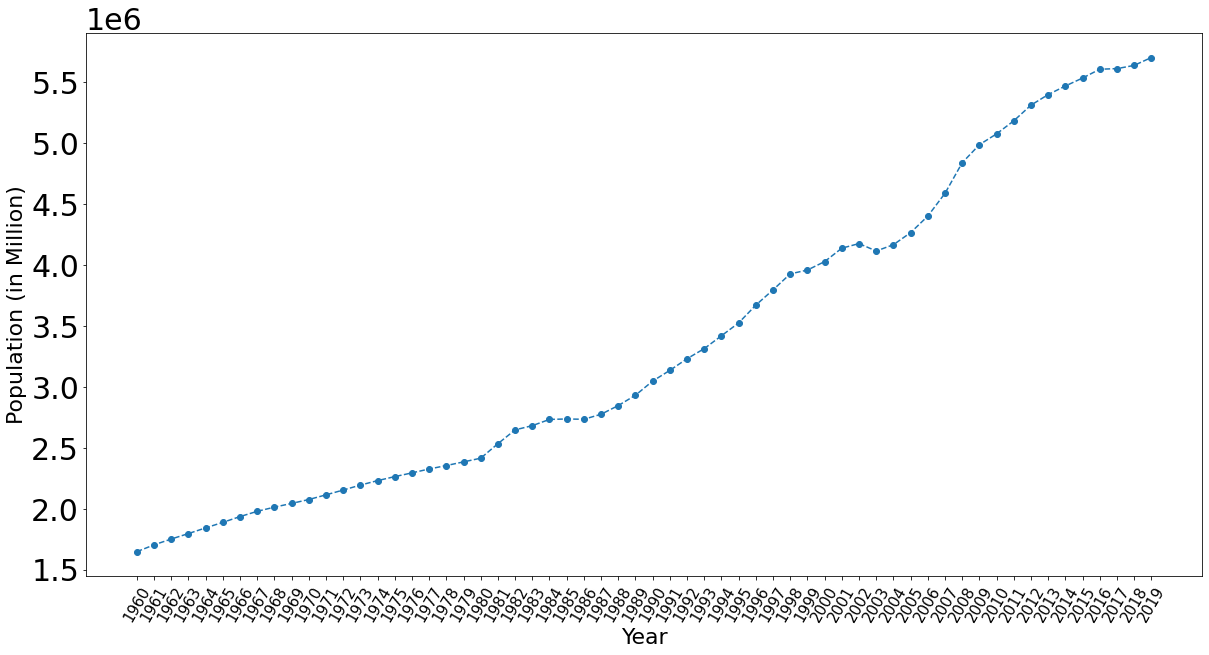

In [26]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize = (20,10))
plt.plot(SG_population_data['Year'], SG_population_data['Population'], '--o');
plt.xlabel('Year')
plt.ylabel('Population (in Million)')
matplotlib.rc('xtick', labelsize=12) 
plt.xticks(rotation = 60);

In [19]:
os.chdir('..')

In [20]:
os.chdir('Generated DataFrames/')

In [21]:
!pwd

/c/Users/Bharath/anaconda3/envs/SG_Land_Reclamation_analysis/Generated DataFrames


In [22]:
SG_population_data.to_csv('SG_population_data.csv', index= False)